# Wine quality test

## 1. Package import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

## 2. Data load

In [4]:
df = pd.read_csv('../00_DATASETS/winequality-white.csv', delimiter= ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 3. Preprocessing of dataset

### 3.1 General view

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### 3.2 Null data theatment

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3.3 Unique data

In [7]:
df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

### 3.4 Duplicate data

In [8]:
df.duplicated().sum()

937

Since there is duplicated data let's eliminate it.

In [9]:
df = df.drop_duplicates()

### 3.5 Statistics variables

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


With the above information it can be concluded that:

1. The majority of the components has a normal distribution without counting *residual sugar*, *free sulfur dioxide* and *total sulfur dioxide* 

2. For the three previous variables is worth to mention that they problabe have atipic values.

Through visualization can be verify these conclusions.

## 4. Data visualisation

Starting with an histogram from every variable of the dataset.

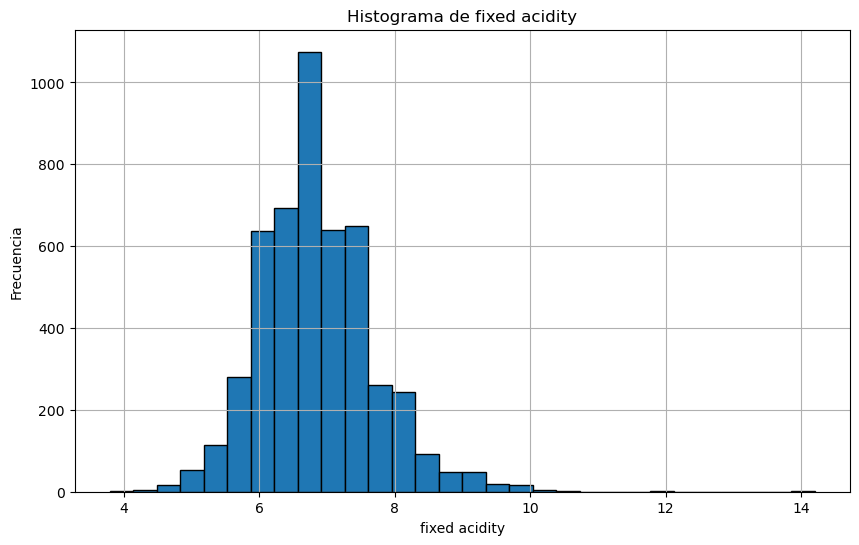

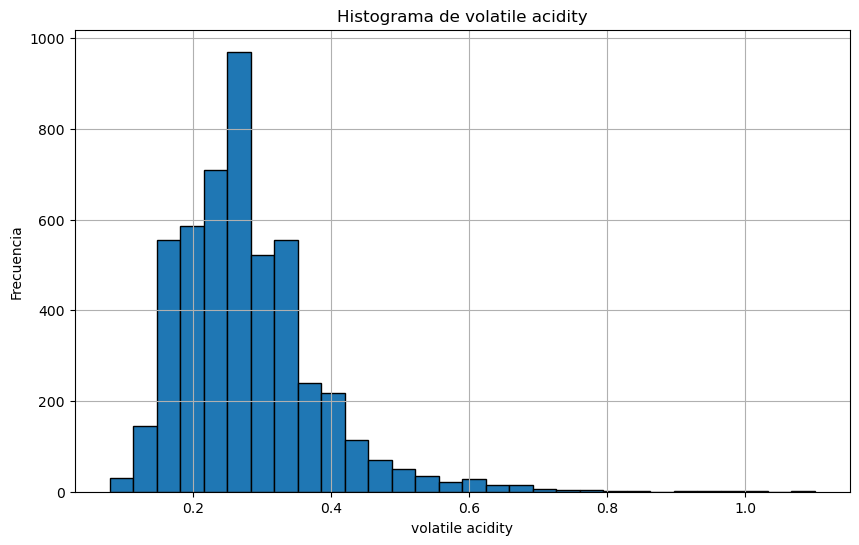

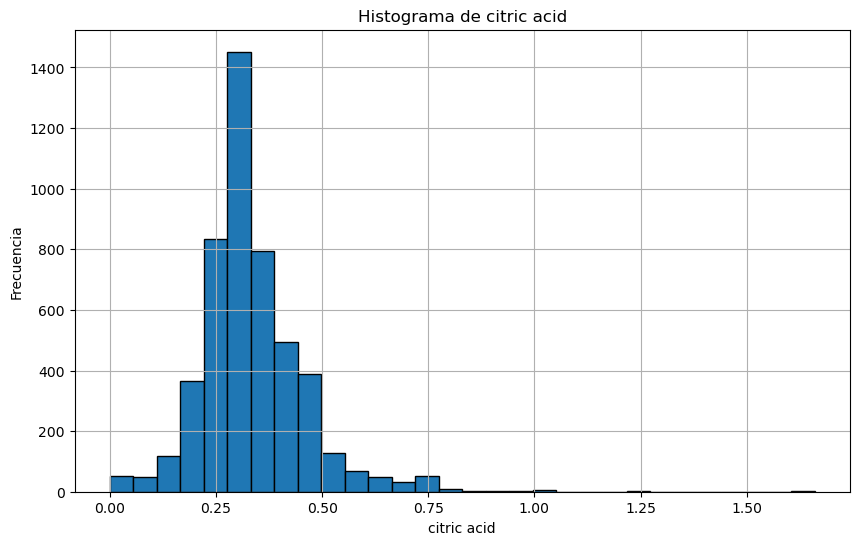

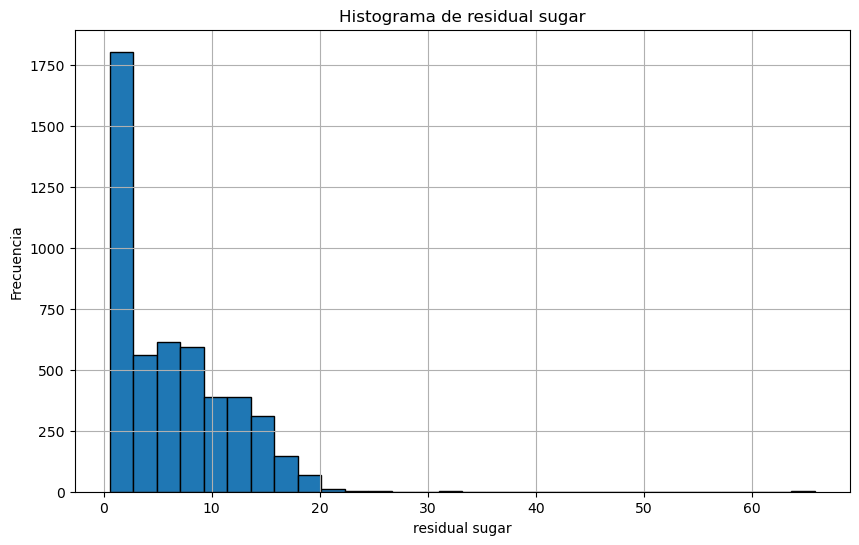

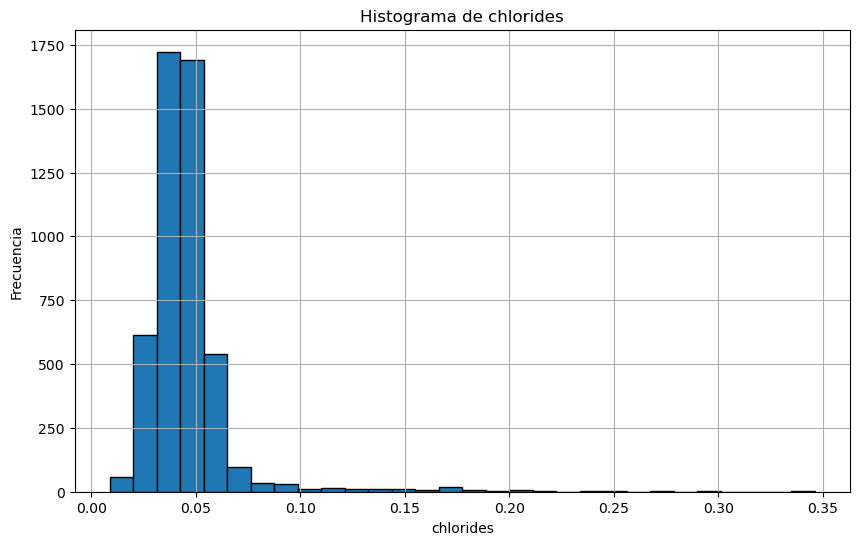

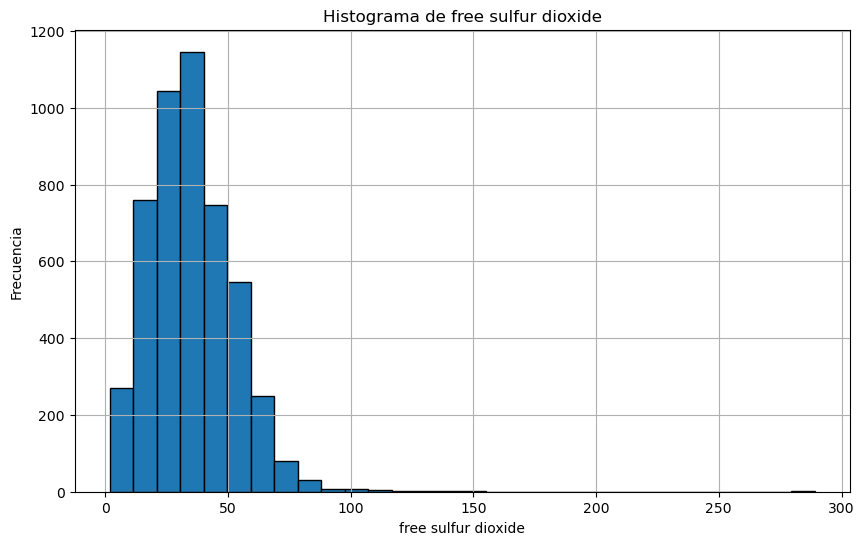

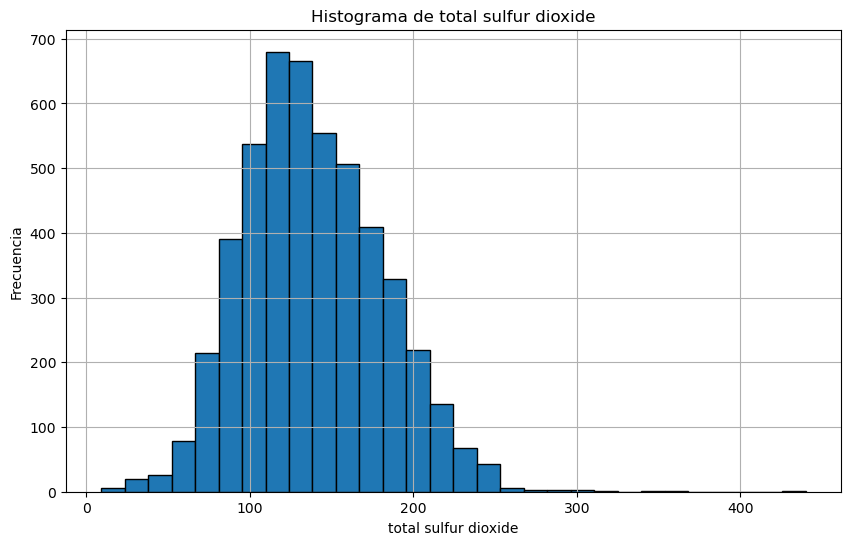

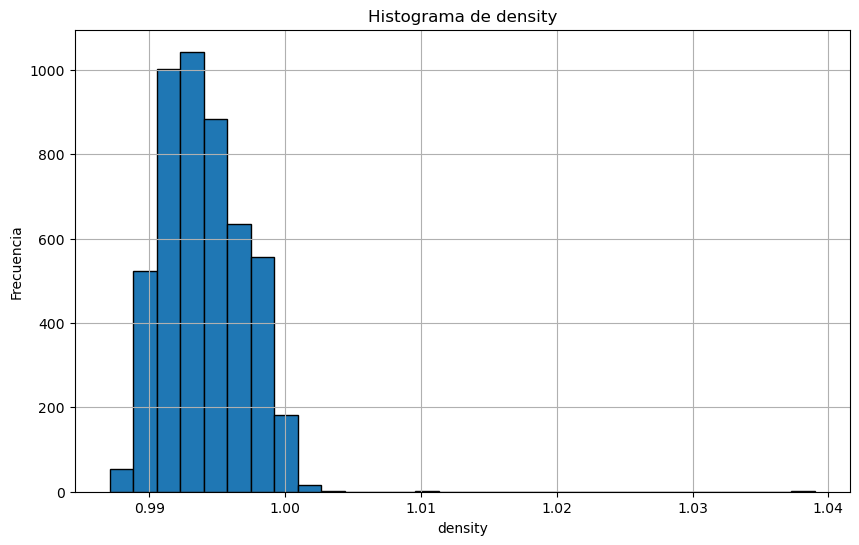

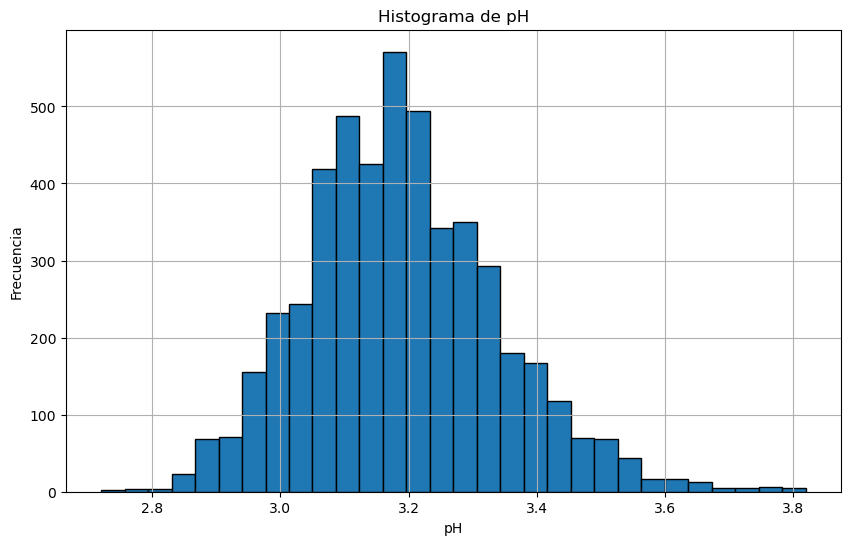

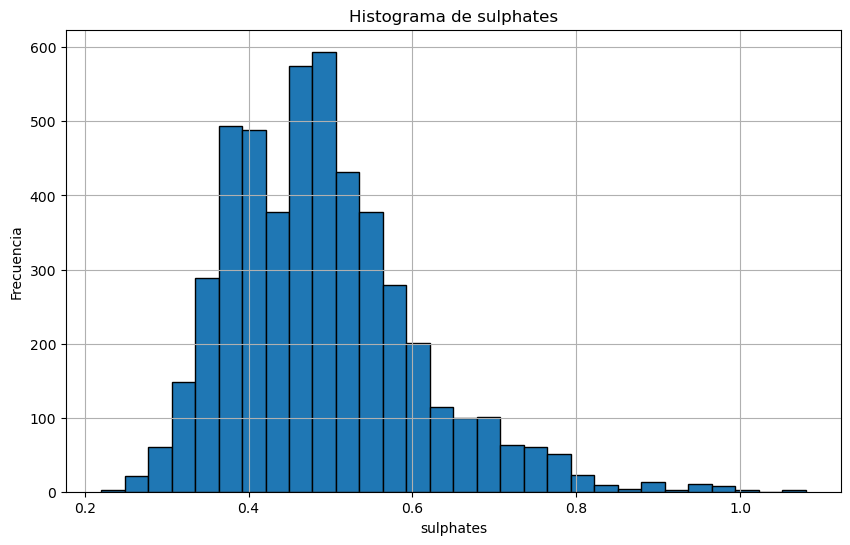

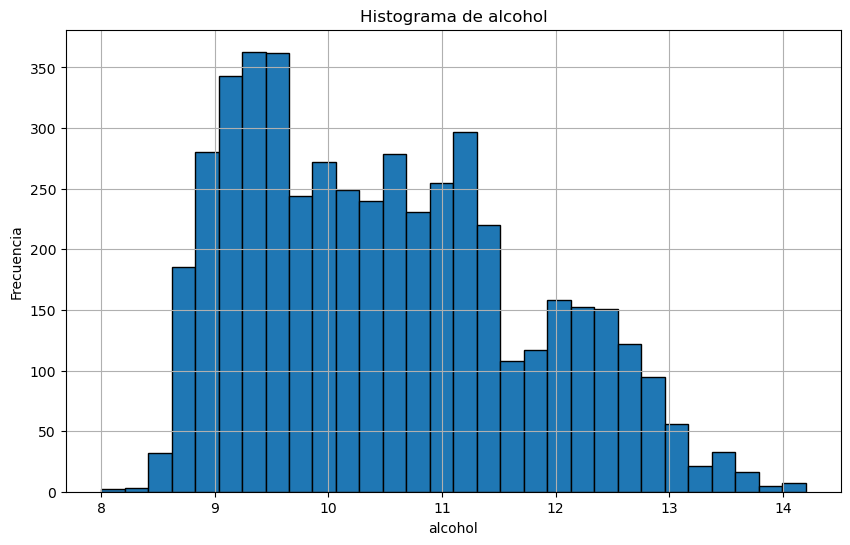

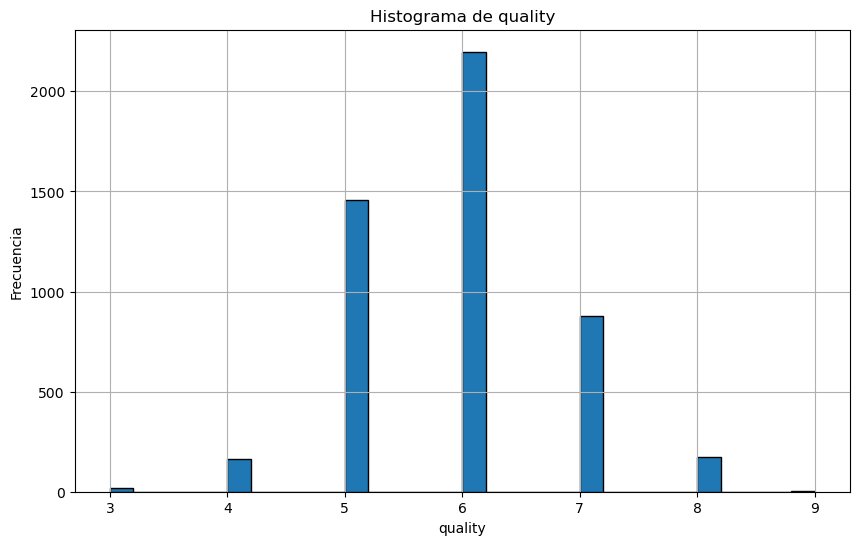

In [9]:
for column in df.select_dtypes(include = ['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins = 30, edgecolor = 'k')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

It can be seen that the assumption about the distribution wasn't correct. The only variable that do not have a normal distribution is *alcohol*. Also *fixed acid*, *cictric acid*, *chlorides* and *density* haves atipic values. In order to determinate what to do with them, first check how many of them are there.

In [24]:
df['fixed acidity'].value_counts().reset_index().tail(10)

,fixed acidity,count
58,3.80,1
59,6.45,1
60,10.20,1
61,4.50,1
62,6.15,1
63,4.60,1
64,11.80,1
65,14.20,1
66,10.70,1
67,3.90,1


In [57]:
df[(df['fixed acidity'] == 11.80)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.9997,2.93,0.55,9.7,3


In [52]:
df[df['fixed acidity'] == 14.20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1526,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.992,3.15,0.54,11.1,6


In [25]:
df['citric acid'].value_counts().reset_index().tail(10)

,citric acid,count
77,0.79,2
78,0.82,2
79,0.11,1
80,1.23,1
81,0.86,1
82,0.88,1
83,0.80,1
84,0.99,1
85,1.66,1
86,0.91,1


In [36]:
df[df['citric acid'] == 1.23]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6


In [37]:
df[df['citric acid'] == 1.66]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
745,7.4,0.2,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6


In [41]:
df['residual sugar'].value_counts().reset_index().tail(50)

,residual sugar,count
260,14.55,1
261,8.25,1
262,17.05,1
263,20.15,1
264,9.55,1
265,11.45,1
266,20.70,1
267,10.55,1
268,6.35,1
269,31.60,1


In [42]:
df[df['residual sugar'] == 31.60]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.0103,3.15,0.38,8.8,6


In [43]:
df[df['residual sugar'] == 65.80]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [59]:
df['chlorides'].value_counts().reset_index().tail(30)

,chlorides,count
130,0.121,1
131,0.091,1
132,0.200,1
133,0.132,1
134,0.089,1
135,0.346,1
136,0.114,1
137,0.186,1
138,0.180,1
139,0.240,1


In [60]:
df[df['chlorides'] == 0.346]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
484,6.2,0.37,0.3,6.6,0.346,79.0,200.0,0.9954,3.29,0.58,9.6,5


In [62]:
df['free sulfur dioxide'].value_counts().reset_index().tail(30)

,free sulfur dioxide,count
102,93.0,1
103,51.5,1
104,70.5,1
105,23.5,1
106,28.5,1
107,43.5,1
108,289.0,1
109,30.5,1
110,39.5,1
111,86.0,1


In [63]:
df[df['free sulfur dioxide'] == 289.0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [29]:
df['total sulfur dioxide'].value_counts().reset_index().tail(10)

,total sulfur dioxide,count
241,282.0,1
242,129.5,1
243,217.5,1
244,366.5,1
245,48.0,1
246,307.5,1
247,256.0,1
248,212.5,1
249,344.0,1
250,44.0,1


In [32]:
df['density'].value_counts().reset_index().tail(30)

,density,count
860,0.99229,1
861,0.99975,1
862,0.99924,1
863,0.99873,1
864,0.99407,1
865,0.99806,1
866,0.98923,1
867,0.99453,1
868,0.99361,1
869,0.98853,1


Considering that in all these variables the outlier has a single record, discard it can be an option to improve the model.

<Axes: >

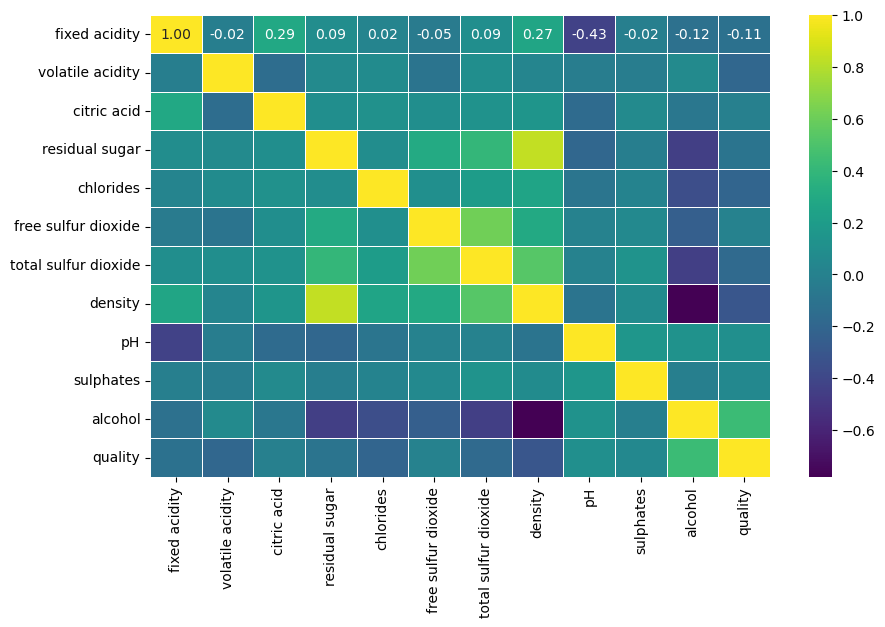

In [10]:
corr = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, fmt= '.2f', cmap = 'viridis', linewidths = 0.5)

<BarContainer object of 4898 artists>

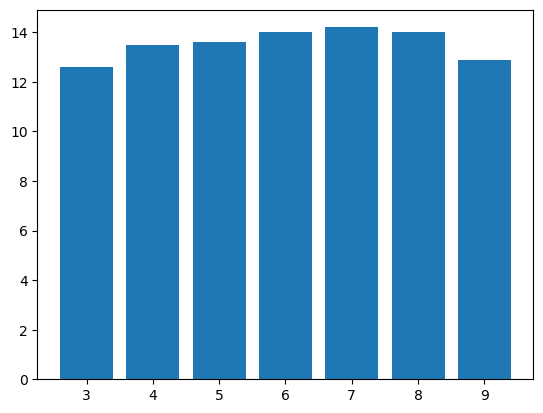

In [11]:
plt.bar(df['quality'], df['alcohol'])

In [12]:
df[df['quality'] == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [13]:
x = df.drop(columns = 'quality')
y = df['quality']

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [15]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression())
])

In [16]:
grid = [{'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear']},
        {'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']},
        {'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']},
        {'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [2, 4, 6]},
        {'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__min_samples_split': [2, 4, 6]},
        {'model': [GradientBoostingClassifier()],
        'model__learning_rate': [0.01, 0.1, 1],
        'model__n_estimators': [50, 100, 200]},
        {'model': [AdaBoostClassifier()],
        'model__learning_rate': [0.01, 0.1, 1],
        'model__n_estimators': [50, 100, 200]},
        {'model': [GaussianNB()]}
       ]

In [17]:
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better= False),
    'MSE': make_scorer(mean_squared_error, greater_is_better= False),
    #RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'R2': make_scorer(r2_score)
}

In [18]:
search_grid = GridSearchCV(estimator = pipe,
                          param_grid = grid,
                          cv = 5,
                          scoring = scoring, refit = 'MAE',
                          verbose = 3)

In [19]:
best_model = search_grid.fit(train_x, train_y)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END model=LogisticRegression(), model__C=0.1, model__solver=liblinear; MAE: (test=-0.580) MSE: (test=-0.755) R2: (test=0.035) total time=   0.0s
[CV 2/5] END model=LogisticRegression(), model__C=0.1, model__solver=liblinear; MAE: (test=-0.577) MSE: (test=-0.743) R2: (test=0.050) total time=   0.0s
[CV 3/5] END model=LogisticRegression(), model__C=0.1, model__solver=liblinear; MAE: (test=-0.587) MSE: (test=-0.774) R2: (test=0.031) total time=   0.0s
[CV 4/5] END model=LogisticRegression(), model__C=0.1, model__solver=liblinear; MAE: (test=-0.566) MSE: (test=-0.724) R2: (test=0.080) total time=   0.0s
[CV 5/5] END model=LogisticRegression(), model__C=0.1, model__solver=liblinear; MAE: (test=-0.561) MSE: (test=-0.739) R2: (test=0.062) total time=   0.0s
[CV 1/5] END model=LogisticRegression(), model__C=1, model__solver=liblinear; MAE: (test=-0.555) MSE: (test=-0.710) R2: (test=0.093) total time=   0.0s
[CV 2/5] END mod

In [20]:
print('La mejor combinacion: ', best_model.best_estimator_)

La mejor combinacion:  Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(min_samples_split=4,
                                        n_estimators=200))])


In [51]:
pd.DataFrame(best_model.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model', 'param_model__C', 'param_model__solver',
       'param_model__n_neighbors', 'param_model__weights',
       'param_model__kernel', 'param_model__criterion',
       'param_model__min_samples_split', 'param_model__n_estimators',
       'param_model__learning_rate', 'params', 'split0_test_MAE',
       'split1_test_MAE', 'split2_test_MAE', 'split3_test_MAE',
       'split4_test_MAE', 'mean_test_MAE', 'std_test_MAE', 'rank_test_MAE',
       'split0_test_MSE', 'split1_test_MSE', 'split2_test_MSE',
       'split3_test_MSE', 'split4_test_MSE', 'mean_test_MSE', 'std_test_MSE',
       'rank_test_MSE', 'split0_test_R2', 'split1_test_R2', 'split2_test_R2',
       'split3_test_R2', 'split4_test_R2', 'mean_test_R2', 'std_test_R2',
       'rank_test_R2'],
      dtype='object')

In [21]:
results = pd.DataFrame(best_model.cv_results_).sort_values(by = 'mean_test_MAE', ascending = False)

In [22]:
temp = results.copy()
temp.drop(columns = ['split0_test_MSE', 'split1_test_MSE', 'split2_test_MSE',
       'split3_test_MSE', 'split4_test_MSE', 'mean_test_MSE', 'std_test_MSE',
       'rank_test_MSE', 'split0_test_R2', 'split1_test_R2', 'split2_test_R2',
       'split3_test_R2', 'split4_test_R2', 'mean_test_R2', 'std_test_R2',
       'rank_test_R2'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__solver,param_model__n_neighbors,param_model__weights,param_model__kernel,...,param_model__learning_rate,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE
26,2.886783,0.073368,0.061023,0.001602,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.380466,-0.392128,-0.405248,-0.364964,-0.363504,-0.381262,0.015969,1
23,3.139649,0.180820,0.068412,0.005315,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.387755,-0.395044,-0.415452,-0.373723,-0.364964,-0.387387,0.017527,2
29,2.731751,0.040651,0.063812,0.013120,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.390671,-0.386297,-0.412536,-0.376642,-0.381022,-0.389434,0.012486,3
28,1.326279,0.027100,0.028907,0.001282,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.389213,-0.387755,-0.408163,-0.388321,-0.378102,-0.390311,0.009792,4
25,1.375538,0.019455,0.029996,0.002579,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.381924,-0.393586,-0.425656,-0.379562,-0.373723,-0.390890,0.018544,5
21,0.741759,0.036347,0.017802,0.000983,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.380466,-0.397959,-0.422741,-0.376642,-0.389781,-0.393518,0.016388,6
24,0.719163,0.043018,0.017081,0.001037,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.380466,-0.406706,-0.424198,-0.382482,-0.391241,-0.397019,0.016439,7
22,1.456551,0.028824,0.030350,0.001993,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.392128,-0.400875,-0.431487,-0.385401,-0.378102,-0.397599,0.018536,8
27,0.687635,0.039408,0.017318,0.001174,"RandomForestClassifier(min_samples_split=4, n_...",NaN,NaN,NaN,NaN,NaN,...,NaN,{'model': RandomForestClassifier(min_samples_s...,-0.395044,-0.399417,-0.428571,-0.402920,-0.378102,-0.400811,0.016285,9
35,11.640000,1.245412,0.017406,0.001511,GradientBoostingClassifier(),NaN,NaN,NaN,NaN,NaN,...,0.1,"{'model': GradientBoostingClassifier(), 'model...",-0.438776,-0.418367,-0.469388,-0.429197,-0.439416,-0.439029,0.017003,10
